# Notebook teste de Pycaret

## 1. Importando os objetos do notebook anterior

In [1]:
%run 1.0.not_apply_sk_pipeline.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 2. Testando o pycaret

In [2]:
from pycaret.classification import *

In [3]:
#---- Criando o setup para o modelo


pycaret_setup = setup(data = dados_treino1,
                      target = "target", 
                      train_size = 0.7, 
                      categorical_features = ["education_level", "relevent_experience", "city", "gender", "major_discipline", "company_type",
                                              "experience", "company_size", "last_new_job", "city"], 
                      categorical_imputation = "mode",              
                      numeric_features = ["city_development_index", "training_hours"],
                      ignore_features = ["enrollee_id"],
                      imputation_type = 'iterative', 
                      fold = 5)

,Description,Value
0,session_id,4553
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19158, 14)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
#---- Comparando os modelos

compare_models(fold = 4, sort = "precision")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7780,0.7938,0.3142,0.6045,0.4134,0.2930,0.3169,0.2825
ridge,Ridge Classifier,0.7811,0.0000,0.3675,0.5987,0.4549,0.3279,0.3433,0.0550
lr,Logistic Regression,0.7811,0.7959,0.3693,0.5975,0.4562,0.3287,0.3437,2.1425
gbc,Gradient Boosting Classifier,0.7928,0.8011,0.5277,0.5944,0.5586,0.4239,0.4255,0.8850
lda,Linear Discriminant Analysis,0.7840,0.7932,0.4456,0.5874,0.5066,0.3717,0.3776,0.3625
lightgbm,Light Gradient Boosting Machine,0.7910,0.8013,0.5505,0.5854,0.5673,0.4297,0.4301,0.1125
rf,Random Forest Classifier,0.7826,0.7885,0.4576,0.5805,0.5117,0.3744,0.3789,0.7100
et,Extra Trees Classifier,0.7770,0.7644,0.4474,0.5661,0.4997,0.3587,0.3629,1.0925
knn,K Neighbors Classifier,0.7479,0.6895,0.3274,0.4903,0.3922,0.2412,0.2492,0.7750
dt,Decision Tree Classifier,0.7304,0.6410,0.4636,0.4590,0.4611,0.2814,0.2815,0.1050


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4553)

In [5]:
#---- Criando o seu modelo

lgbm1 = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7912,0.7948,0.5292,0.5893,0.5577,0.4215,0.4226
1,0.7923,0.7877,0.5434,0.5902,0.5659,0.4297,0.4303
2,0.7871,0.7873,0.5614,0.5743,0.5678,0.4265,0.4266
3,0.7990,0.8215,0.6078,0.5944,0.6010,0.4667,0.4668
4,0.7972,0.8050,0.5704,0.5972,0.5835,0.4495,0.4497
Mean,0.7934,0.7992,0.5624,0.5891,0.5752,0.4388,0.4392
SD,0.0043,0.0128,0.0268,0.0079,0.0154,0.0169,0.0167


In [6]:
#---- Tunando o modelo escolhido

lgbm1_tune = tune_model(lgbm1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7860,0.7978,0.5112,0.5789,0.5430,0.4040,0.4053
1,0.7957,0.7897,0.5284,0.6024,0.5630,0.4304,0.4320
2,0.7837,0.7931,0.5240,0.5719,0.5469,0.4052,0.4059
3,0.8117,0.8295,0.6332,0.6193,0.6262,0.5004,0.5004
4,0.7990,0.8087,0.5689,0.6022,0.5851,0.4526,0.4529
Mean,0.7952,0.8038,0.5531,0.5950,0.5728,0.4385,0.4393
SD,0.0100,0.0144,0.0445,0.0173,0.0305,0.0358,0.0354


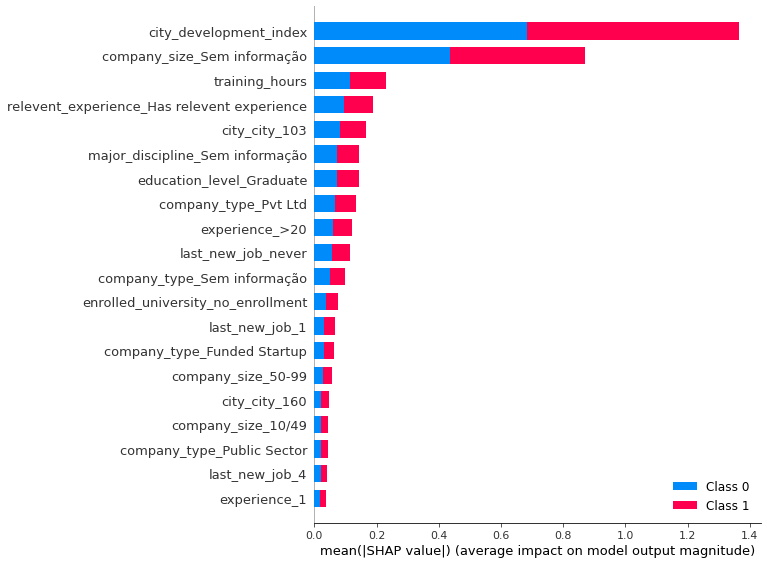

In [7]:
#---- Interpretação do modelo

interpret_model(lgbm1)

In [8]:
#---- Avaliando o modelo

evaluate_model(lgbm1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…